In [241]:
import sqlite3

import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler

sns.set_style("darkgrid")
float_formatter = "{:.5}".format
np.set_printoptions(formatter={"float_kind": float_formatter})
random_state = 42

In [221]:
def dict_factory(cursor, row):
    col_names = [col[0] for col in cursor.description]
    return {key: value for key, value in zip(col_names, row)}


query1 = """
    SELECT
        g.result,
        --g.start_time + 40 * g.increment as total_time,
        g.increment,
        g.start_time,
        g.url,
        p.eval,
        p.ply,
        g.elo_white - g.elo_black as elo_dif,
        1 as weight
    FROM
        games g INNER JOIN positions p
        ON g.rowid = p.game_id
    WHERE
        g.result == 1
        AND p.eval is not NULL
    """

with sqlite3.connect("games.sqlite") as con:
    con.row_factory = dict_factory
    res = con.execute(query1)
    data = pd.DataFrame(res)

con.close()

In [225]:
min_evals = data.groupby("url").min()["eval"]

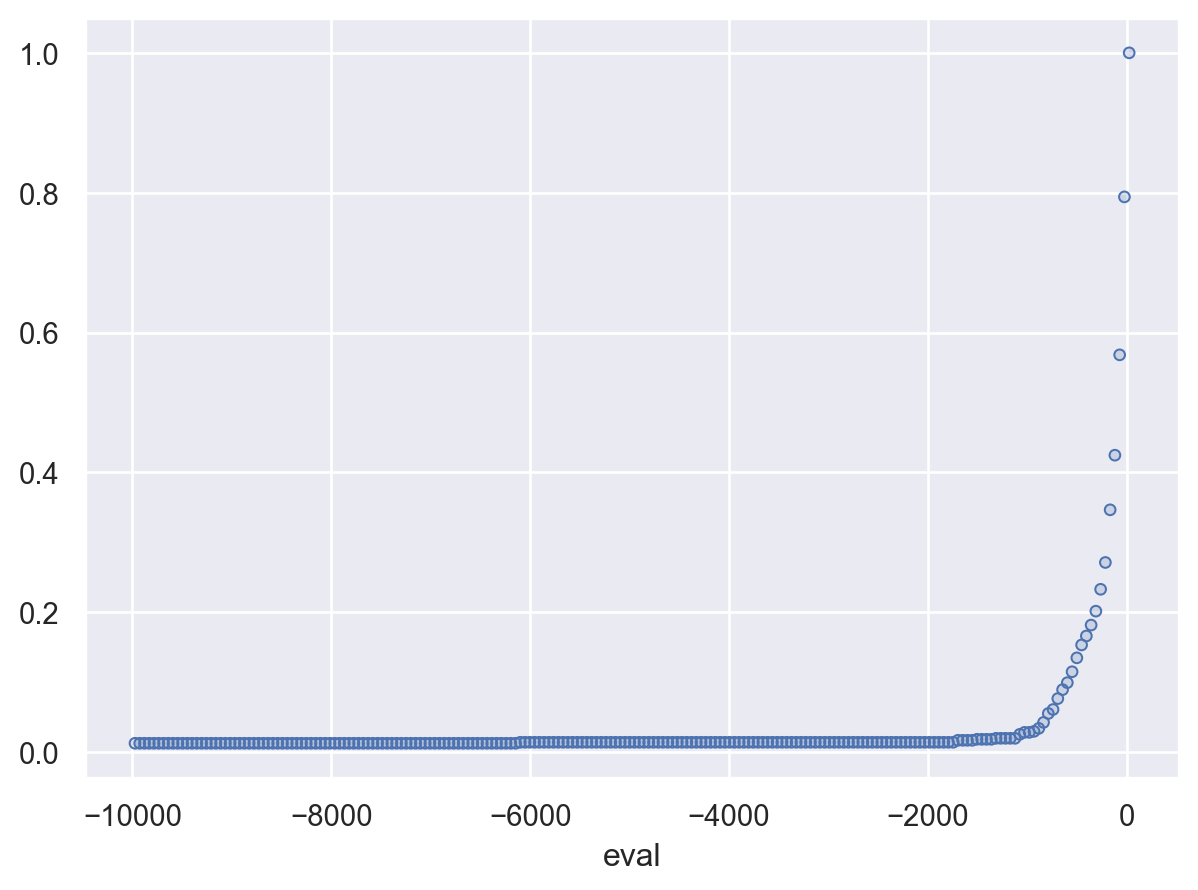

In [230]:
so.Plot(x=min_evals, y=0).add(so.Dots(), so.Hist(cumulative=True, stat="density"))

In [254]:
hist = np.histogram(min_evals, density=False, bins=1000)

In [255]:
dist = scipy.stats.rv_histogram(hist)

In [289]:
np.flip(dist.cdf(np.arange(-1000, 0, 50).reshape(-1, 1)))

array([[0.56098],
       [0.42243],
       [0.33411],
       [0.26319],
       [0.22306],
       [0.19629],
       [0.17749],
       [0.16051],
       [0.14353],
       [0.12151],
       [0.10957],
       [0.09284],
       [0.081285],
       [0.069985],
       [0.058239],
       [0.045509],
       [0.037505],
       [0.030858],
       [0.028409],
       [0.028409]])

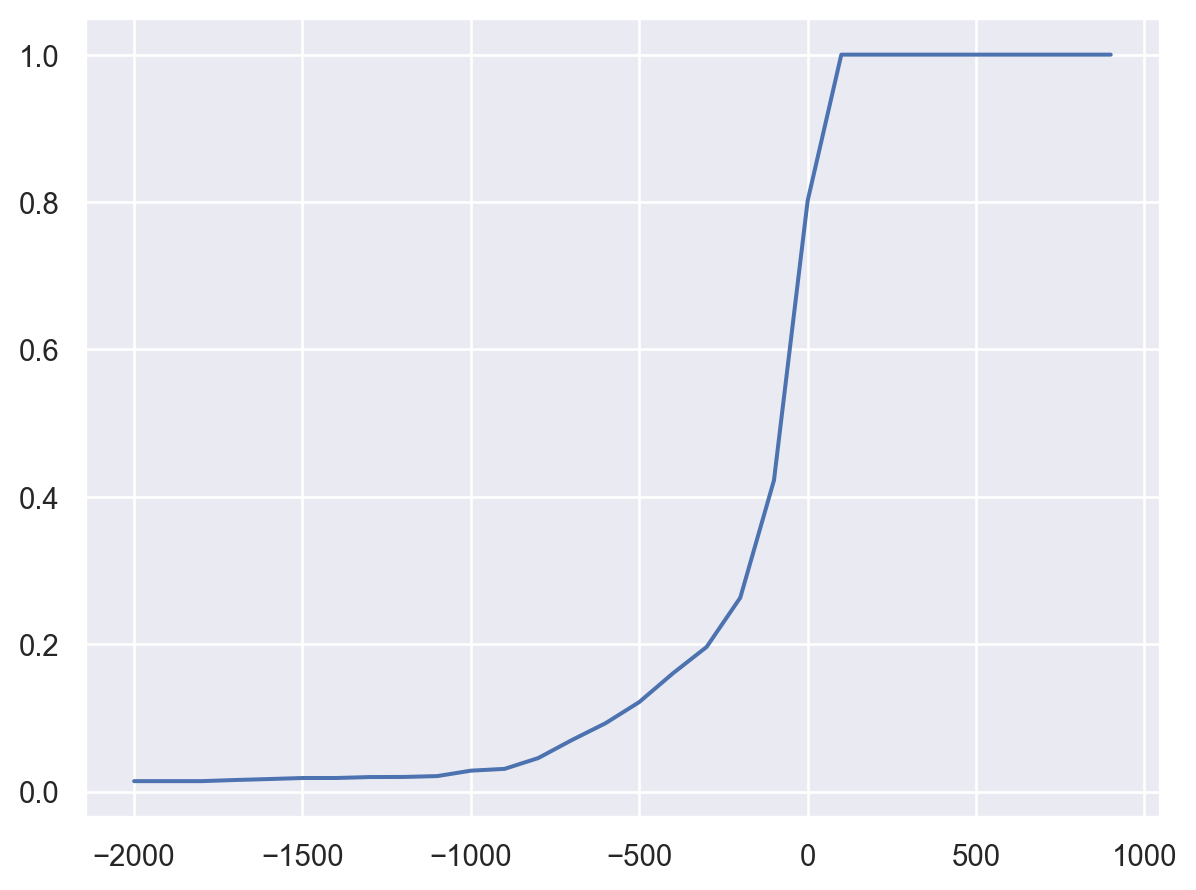

In [278]:
so.Plot(x=np.arange(-2000, 1000, 100), y=dist.cdf(np.arange(-2000, 1000, 100))).add(
    so.Line(),
)